In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input, Flatten
import numpy as np

from dataset import load_hoda

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
X_train_orignal, y_train_orignal, X_test_orignal, y_test_orignal = load_hoda()

In [3]:
#y_train = keras.utils.to_categorical(y_train_orignal,num_classes=10) # make one hot
#y_test = keras.utils.to_categorical(y_test_orignal,num_classes=10)  # make one hot
y_train = y_train_orignal
y_test = y_test_orignal

In [4]:
X_train = X_train_orignal.astype('float32')
X_test = X_test_orignal.astype('float32')
X_train /= 255  # because each pixel is 0-255
X_test /= 255

In [5]:
X_train.shape

(1000, 25)

In [6]:
model = Sequential()
model.add(Input(shape=X_train[0].shape)) # or model.add(Flatten(input_shape=(5,5))) without reshaping the images
model.add(Dense(64,activation="relu"))
model.add(Dense(10))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1637 - loss: 2.2731 - val_accuracy: 0.3050 - val_loss: 2.1544
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3675 - loss: 2.0872 - val_accuracy: 0.5250 - val_loss: 1.9864
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5537 - loss: 1.9317 - val_accuracy: 0.6250 - val_loss: 1.8254
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 1.7799 - val_accuracy: 0.6900 - val_loss: 1.6628
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7237 - loss: 1.6273 - val_accuracy: 0.7400 - val_loss: 1.5061
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 1.4802 - val_accuracy: 0.7750 - val_loss: 1.3627
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7812 - loss: 1.3358 - val_accuracy: 0.7850 - val_loss: 1.2226
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 1.2009 - val_accuracy: 0.8150 - 

In [9]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

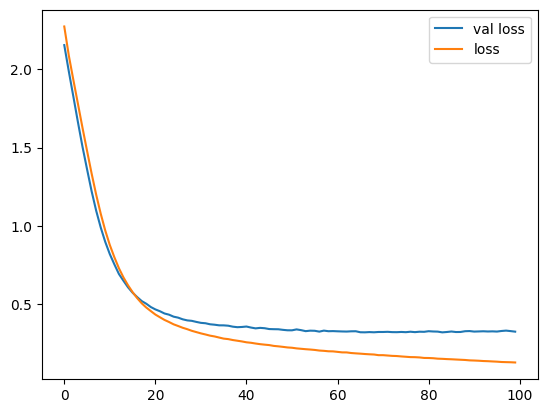

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],label="val loss")
plt.plot(history.history['loss'],label="loss")
plt.legend()

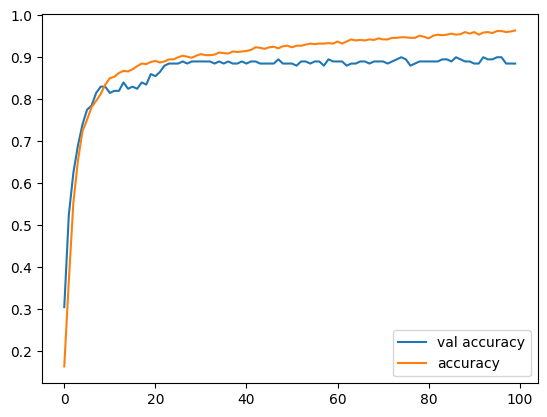

In [11]:
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.plot(history.history['accuracy'],label="accuracy")
plt.legend()

In [12]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"loss is {loss:.2f} and accuracy is {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9250 - loss: 0.2431 
loss is 0.24 and accuracy is 0.93


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
The max probability for sample 5 is 5.1178 and predicted value is 5, actual value is 0


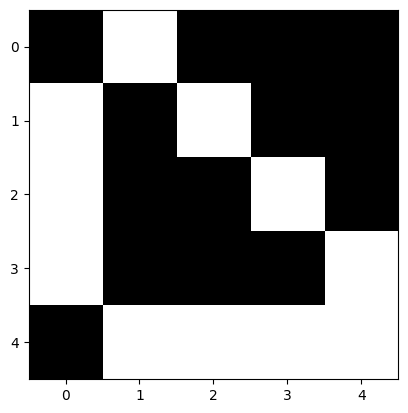

In [13]:
y_test_predicted = model.predict(X_test) # probability of each value
sample = 5
print(f"The max probability for sample {sample} is {y_test_predicted[sample].max():.4f} and\
 predicted value is {y_test_predicted[sample].argmax()}, actual value is {y_test[sample].argmax()}")
plt.imshow(X_test[sample].reshape(5,5), cmap="gray", label=f"resized image of sample {sample}")

In [14]:
# all predicted values
y_test_predicted.argmax(axis=1)

array([7, 2, 3, 9, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 2, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 2, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 7, 2,
       1, 2, 7, 9, 0, 3, 7, 5, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 6, 6,
       2, 4, 2, 4, 4, 5, 9, 1, 8, 4, 0, 5, 6, 2, 4, 6, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 7, 2, 3, 1, 0, 2, 9, 6, 3, 5, 5, 0, 0, 9,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 9,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 5, 2, 9, 3, 8, 2, 7, 0, 9, 9, 0, 7,
       6, 5, 4, 4, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 3, 4, 1, 3, 3, 1, 1, 3, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5])

In [15]:
# show which of them is oredicted correctly
y_test_predicted.argmax(axis=1) == y_test.argmax(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

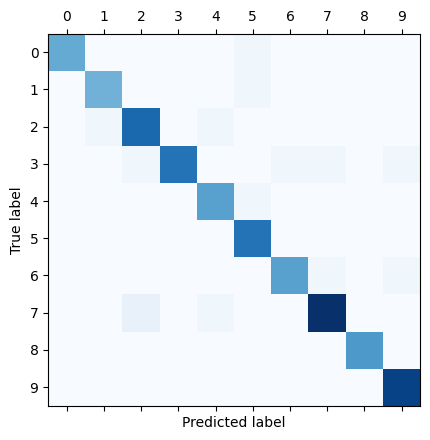

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test.argmax(axis=1),y_test_predicted.argmax(axis=1)),cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");